Subtask1

In [0]:
import os
import re
import numpy as np
from matplotlib import pyplot as plt
from math import *
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
PATH = '/content/gdrive/My Drive/IRDM_CHFX2/'

In [0]:
def n_dict_subtask1(filepath):
    '''
    The input is the path of wiki-pages.
    The output is a dictionary which the key is the terms and the value is the freuquency.
    The output is 90MB so it is not including in the file.
    '''
    n_dict = {}
    files = os.listdir(filepath)
    for i in files:
        with open(os.path.join(filepath, i)) as fp:
            lines = fp.readlines()
            for line in lines:
                text = eval(line)['text'] ## extract data from the field of 'text'.
                words = text.split(' ')
                for w in words:
                    w = w.replace("-LRB-","").replace("-RRB-","").replace("-LSB-","").replace("-RSB-","").replace("--","")
                    w = w.lower()
                    w = re.sub("[,.。:_=+*&^%$#@!?()<>/`';|]", "", w) ## replace the noisy with space. 
                    if not w in n_dict:
                        n_dict[w] = 1
                    else:
                        n_dict[w] += 1 ## count the frequencies of every term.
    np.save(PATH + "n_dict_Subtask1.npy",n_dict)
    print ('save complete')

In [5]:
n_dict_subtask1(PATH + 'data/wiki-pages/wiki-pages/')

save complete


In [0]:
def Subtask1(n_dict_npy):
    '''
    The input is the path of n_dict_Subtask1.npy.
    The output is the Zipf's Law graph and the CSV of all the terms and there frequencies.
    The output is 300MB so it is not including in the file. I extract the result of top 500 terms and save it in the file as 'Q1_term_frequency.csv'.
    '''
    n_dict = np.load(n_dict_npy, allow_pickle=True).item()
    data = sorted(n_dict.items(), key=lambda item:n_dict[item[0]], reverse=True) ## sort the data.
    total = 0
    for d in data:
        total += d[1] ## count the total number of words.
    df = pd.DataFrame(data, columns = ['term','Freq'])[1:] #exclude 'space'
    df['rank'] = df.index
    df['Pr(%)'] = df['Freq'].div(total)*100
    df['r*Pr'] = df['rank']*df['Pr(%)']/100
    df_plot =df[:100] ## plot the top 100 terms.
    # data = data[:100]
    plt.plot(df_plot['rank'],df_plot['Pr(%)'],'b-')
    plt.plot(np.arange(0,100,1),10/np.arange(0,100,1),'r:')
    # plt.plot([d[0] for d in data], [d[1] / total for d in data])
    plt.yticks(np.arange(0,10,0.5))
    plt.xticks(np.arange(0,101,10))
    plt.ylabel('Probability(%)')
    plt.xlabel('Rank (by decreasing frequency)')
    plt.title("Zipf's Law")
    plt.show()
    # plt.savefig('res.jpg')
    print(total)
    print(df.head(25))
    df.to_csv(PATH + 'Subtask1.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


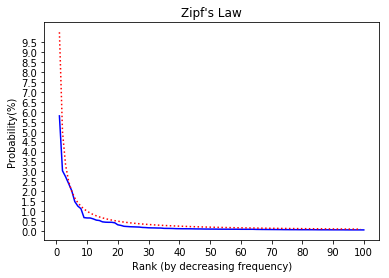

530598188
     term      Freq  rank     Pr(%)      r*Pr
1     the  30746674     1  5.794719  0.057947
2      of  16098465     2  3.034022  0.060680
3      in  14520729     3  2.736671  0.082100
4     and  12695179     4  2.392616  0.095705
5       a  10797630     5  2.034992  0.101750
6      is   7881498     6  1.485399  0.089124
7      to   6671325     7  1.257321  0.088013
8     was   5991677     8  1.129231  0.090338
9      as   3604873     9  0.679398  0.061146
10     by   3515931    10  0.662635  0.066264
11    for   3511554    11  0.661810  0.072799
12     on   3263504    12  0.615061  0.073807
13     it   2937235    13  0.553570  0.071964
14     he   2834309    14  0.534172  0.074784
15   with   2476939    15  0.466820  0.070023
16   from   2384877    16  0.449469  0.071915
17      s   2357221    17  0.444257  0.075524
18     at   2355759    18  0.443982  0.079917
19     an   2220574    19  0.418504  0.079516
20    his   1684892    20  0.317546  0.063509
21   that   1530877    2

In [0]:
Subtask1(PATH + 'n_dict_Subtask1.npy')